# Module Thesis: Predicting short-run exchange rates with macroeconomic variables (Group V)

**Zurich University of Applied Sciences\
School of Management and Law\
Master's Degree Program in Banking and Finance**

**Advanced Quantitative Methods - FS 2022**

**Author:**\
Milasta, Nico: milasnic@students.zhaw.ch \
Schädler, Susan: schaesu1@students.zhaw.ch \
Vangsted, Tobias: vangstob@students.zhaw.ch

**Supervisor:**\
Dr. Tomasz Orpiszewski

***
## Download time series from Eikon
**Note**: For confidentiality reasons, the API key is stored in a separate Python file. To run the following code to download the time series, a separate Python file must first be created. The file name should be `my_eikon_key.py`, which corresponds to the import statement from the following code. The API key is stored in this file as a string variable called `key`. This variable is then imported into the current file; see the section "Setting the API key" below.

In [1]:
%reset

# Import modules
import pandas as pd
import eikon as ek

# Pickle data?
save_data = False

# Set API key
from my_eikon_key import key
print(f"API Key: {key}")
ek.set_app_key(key)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
API Key: Pssst... top secret :D


2022-05-04 18:11:41,651 P[6028] [MainThread 17780] Error: no proxy address identified.
Check if Eikon Desktop or Eikon API Proxy is running.
2022-05-04 18:11:41,652 P[6028] [MainThread 17780] Port number was not identified, cannot send any request
2022-05-04 18:11:41,654 P[6028] [MainThread 17780] Port number was not identified.
Check if Eikon Desktop or Eikon API Proxy is running.


EikonError: Error code -1 | Port number was not identified. Check if Eikon Desktop or Eikon API Proxy is running.

In [19]:
# Function for downloading the time series
start_date = "2008-10-31"
end_date = "2020-03-31"
interval="monthly"

df = pd.DataFrame()

def load_data(df, ric, start_date, end_date, interval, fields):
    for i in rics:
        req = ek.get_timeseries([i], start_date = start_date, end_date = end_date, interval=interval, fields=fields)
        req.columns = pd.Index([i])
        df = pd.concat([df,req], axis=1)
        print(f"RIC '{i}' loaded")
    return df

In [20]:
# FX exchange rates
rics = ["EUR=", "JPY=", "GBP=", "CHF=", "AUD="]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields="CLOSE")

RIC 'EUR=' loaded
RIC 'JPY=' loaded
RIC 'GBP=' loaded
RIC 'CHF=' loaded
RIC 'AUD=' loaded


In [21]:
# 1 year benchmark bond yields
rics = ["US1YT=RR", "EU1YT=RR", "JP1YT=RR", "GB1YT=RR", "CH1YT=RR", "AU1YT=RR"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields="CLOSE")

RIC 'US1YT=RR' loaded
RIC 'EU1YT=RR' loaded
RIC 'JP1YT=RR' loaded
RIC 'GB1YT=RR' loaded
RIC 'CH1YT=RR' loaded
RIC 'AU1YT=RR' loaded


In [22]:
# 10 year benchmark bond yields
rics = ["US10YT=RR", "EU10YT=RR", "JP10YT=RR", "GB10YT=RR", "CH10YT=RR", "AU10YT=RR"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields="CLOSE")

RIC 'US10YT=RR' loaded
RIC 'EU10YT=RR' loaded
RIC 'JP10YT=RR' loaded
RIC 'GB10YT=RR' loaded
RIC 'CH10YT=RR' loaded
RIC 'AU10YT=RR' loaded


In [23]:
# Stock market index
rics = ["aUSSHRPRCF", "aFRSHRPRCF/C", "aJPSHRPRCF", "aGBSHRPRCF", "aCHSHRPRCF/C", "aAUSHRPRCF/C"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields=None)

RIC 'aUSSHRPRCF' loaded
RIC 'aFRSHRPRCF/C' loaded
RIC 'aJPSHRPRCF' loaded
RIC 'aGBSHRPRCF' loaded
RIC 'aCHSHRPRCF/C' loaded
RIC 'aAUSHRPRCF/C' loaded


In [24]:
# Consumer price index
rics = ["aUSCCPIE/CA", "aXZCCPIE/CA", "aJPCCPIE/CA", "aGBCCPIE/CA", "aCHCCPIE/CA", "aAUCCPIE/CA"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields=None)

RIC 'aUSCCPIE/CA' loaded
RIC 'aXZCCPIE/CA' loaded
RIC 'aJPCCPIE/CA' loaded
RIC 'aGBCCPIE/CA' loaded
RIC 'aCHCCPIE/CA' loaded
RIC 'aAUCCPIE/CA' loaded


In [25]:
# Producer price index
rics = ["aUSCPPIE/CA", "aXZCPPIE/CA", "aJPCPPIE/CA", "aGBCPPIE/CA", "aCHCPPIE/CA", "aAUCPPIE/CA"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields=None)

RIC 'aUSCPPIE/CA' loaded
RIC 'aXZCPPIE/CA' loaded
RIC 'aJPCPPIE/CA' loaded
RIC 'aGBCPPIE/CA' loaded
RIC 'aCHCPPIE/CA' loaded
RIC 'aAUCPPIE/CA' loaded


In [26]:
# Consumer confidence index
rics = ["aUSOCS005Q/A", "aEKOCS005Q/A", "aJPCONCF/A", "aGBOCS005Q/A", "aAURMCONFR"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields=None)

RIC 'aUSOCS005Q/A' loaded
RIC 'aEKOCS005Q/A' loaded
RIC 'aJPCONCF/A' loaded
RIC 'aGBOCS005Q/A' loaded
RIC 'aAURMCONFR' loaded


In [27]:
# Retail sales
rics = ["aUSRSLS/A", "aXZRSLS/A", "aJPRSLS/A", "aGBRSLS/A", "aCHRSLS/CA", "aAURSLSM/A"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields=None)

RIC 'aUSRSLS/A' loaded
RIC 'aXZRSLS/A' loaded
RIC 'aJPRSLS/A' loaded
RIC 'aGBRSLS/A' loaded
RIC 'aCHRSLS/CA' loaded
RIC 'aAURSLSM/A' loaded


In [28]:
# Trade balance
rics = ["aUSTBALEU", "aUSTBALJP", "aUSTBALWEU", "aUSBTPCASA"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields=None)

RIC 'aUSTBALEU' loaded
RIC 'aUSTBALJP' loaded
RIC 'aUSTBALWEU' loaded
RIC 'aUSBTPCASA' loaded


In [29]:
# Gold price
rics = ["XAU="]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields="CLOSE")

RIC 'XAU=' loaded


In [30]:
# M1 money supply
rics = ["aUSCMS1B/A", "aXZCMS1B/A", "aJPCMS1B/A", "aGBCMS1B/A", "aCHCMS1B/A", "aAUCMS1B/A"]
df = load_data(df=df, ric=rics, start_date=start_date, end_date=end_date, interval=interval, fields=None)

RIC 'aUSCMS1B/A' loaded
RIC 'aXZCMS1B/A' loaded
RIC 'aJPCMS1B/A' loaded
RIC 'aGBCMS1B/A' loaded
RIC 'aCHCMS1B/A' loaded
RIC 'aAUCMS1B/A' loaded


In [31]:
# Pickle dataframe
if save_data:
    df.to_pickle("raw_data.pkl")
    print("Data was pickled")

***
## Verification of the data

In [71]:
%reset

# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load data into the database?
save_data = True

# Load pickled dataframe
df = pd.read_pickle("raw_data.pkl")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [72]:
# Verify the structure of the data
df.isna().sum()

EUR=            0
JPY=            0
GBP=            0
CHF=            0
AUD=            0
US1YT=RR        0
EU1YT=RR        0
JP1YT=RR        0
GB1YT=RR        0
CH1YT=RR        0
AU1YT=RR        0
US10YT=RR       0
EU10YT=RR       0
JP10YT=RR       0
GB10YT=RR       0
CH10YT=RR       0
AU10YT=RR       0
aUSSHRPRCF      0
aFRSHRPRCF/C    0
aJPSHRPRCF      0
aGBSHRPRCF      0
aCHSHRPRCF/C    0
aAUSHRPRCF/C    0
aUSCCPIE/CA     0
aXZCCPIE/CA     0
aJPCCPIE/CA     0
aGBCCPIE/CA     0
aCHCCPIE/CA     0
aAUCCPIE/CA     0
aUSCPPIE/CA     0
aXZCPPIE/CA     0
aJPCPPIE/CA     0
aGBCPPIE/CA     0
aCHCPPIE/CA     0
aAUCPPIE/CA     0
aUSOCS005Q/A    0
aEKOCS005Q/A    0
aJPCONCF/A      0
aGBOCS005Q/A    0
aAURMCONFR      0
aUSRSLS/A       0
aXZRSLS/A       0
aJPRSLS/A       0
aGBRSLS/A       0
aCHRSLS/CA      0
aAURSLSM/A      0
aUSTBALEU       0
aUSTBALJP       0
aUSTBALWEU      0
aUSBTPCASA      0
XAU=            0
aUSCMS1B/A      0
aXZCMS1B/A      0
aJPCMS1B/A      0
aGBCMS1B/A      0
aCHCMS1B/A

In [73]:
df.describe()

,EUR=,JPY=,GBP=,CHF=,AUD=,US1YT=RR,EU1YT=RR,JP1YT=RR,GB1YT=RR,CH1YT=RR,...,aUSTBALJP,aUSTBALWEU,aUSBTPCASA,XAU=,aUSCMS1B/A,aXZCMS1B/A,aJPCMS1B/A,aGBCMS1B/A,aCHCMS1B/A,aAUCMS1B/A
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,1.243480,100.598188,1.479372,0.974768,0.841701,0.717500,-0.003848,0.008877,0.504428,-0.097246,...,-5.505992e+09,-1.247972e+10,1.261935e+09,1308.744238,2.764843e+12,7.450175e+12,6.096661e+12,1.994525e+12,5.583459e+11,5.196218e+11
std,0.121245,13.564075,0.142636,0.068648,0.131335,0.773136,0.669916,0.174119,0.293305,0.716460,...,1.001119e+09,4.247972e+09,2.910211e+08,216.149152,7.773924e+11,1.327212e+12,7.613037e+11,2.618966e+11,1.116344e+11,1.148739e+11
min,1.051300,76.190000,1.215600,0.785200,0.613500,0.089000,-0.883000,-0.319000,0.055000,-1.050000,...,-7.315327e+09,-2.401012e+10,5.748787e+08,723.050000,1.473800e+12,5.038305e+12,4.861873e+12,1.477022e+12,2.415168e+11,2.415987e+11
25%,1.121825,89.997500,1.325950,0.931475,0.728175,0.161250,-0.614500,-0.144500,0.351750,-0.710000,...,-6.135183e+09,-1.528919e+10,1.084863e+09,1185.325000,2.116550e+12,6.456815e+12,5.408308e+12,1.738667e+12,5.188607e+11,4.629003e+11
50%,1.248700,102.600000,1.522850,0.970100,0.800600,0.336500,-0.015500,0.057000,0.468000,0.045000,...,-5.630265e+09,-1.224448e+10,1.201937e+09,1283.075000,2.815650e+12,7.180310e+12,6.118161e+12,2.076193e+12,5.897062e+11,5.179617e+11
75%,1.342775,111.282500,1.601300,0.999525,0.940575,1.061500,0.421250,0.123000,0.650750,0.495000,...,-5.077807e+09,-9.545498e+09,1.395568e+09,1417.975000,3.499875e+12,8.273435e+12,6.758278e+12,2.215030e+12,6.406065e+11,6.140067e+11
max,1.500700,124.110000,1.710300,1.213400,1.098800,2.691000,2.692000,0.575000,2.606000,3.860000,...,-1.874462e+09,-3.220115e+09,2.176588e+09,1823.300000,4.261900e+12,1.030180e+13,7.776555e+12,2.429897e+12,7.183682e+11,7.544205e+11


In [74]:
# Graphical verification (plot historical charts)
rics = {"FX_Rate":  ["EUR=", "JPY=", "GBP=", "CHF=", "AUD="],
        "Yield_1Y": ["US1YT=RR", "EU1YT=RR", "JP1YT=RR", "GB1YT=RR", "CH1YT=RR", "AU1YT=RR"],
        "Yield_10Y":    ["US10YT=RR", "EU10YT=RR", "JP10YT=RR", "GB10YT=RR", "CH10YT=RR", "AU10YT=RR"],
        "Equity_Market":    ["aUSSHRPRCF", "aFRSHRPRCF/C", "aJPSHRPRCF", "aGBSHRPRCF", "aCHSHRPRCF/C", "aAUSHRPRCF/C"],
        "CPI":  ["aUSCCPIE/CA", "aXZCCPIE/CA", "aJPCCPIE/CA", "aGBCCPIE/CA", "aCHCCPIE/CA", "aAUCCPIE/CA"],
        "PPI":  ["aUSCPPIE/CA", "aXZCPPIE/CA", "aJPCPPIE/CA", "aGBCPPIE/CA", "aCHCPPIE/CA", "aAUCPPIE/CA"],
        "CCI":  ["aUSOCS005Q/A", "aEKOCS005Q/A", "aJPCONCF/A", "aGBOCS005Q/A", "aAURMCONFR"],
        "Retail_Sales": ["aUSRSLS/A", "aXZRSLS/A", "aJPRSLS/A", "aGBRSLS/A", "aCHRSLS/CA", "aAURSLSM/A"],
        "Trade_Balance":    ["aUSTBALEU", "aUSTBALJP", "aUSTBALWEU", "aUSBTPCASA"],
        "Gold": ["XAU="],
        "Money_Supply": ["aUSCMS1B/A", "aXZCMS1B/A", "aJPCMS1B/A", "aGBCMS1B/A", "aCHCMS1B/A", "aAUCMS1B/A"]
        }

for i in rics.keys():
    for j in rics[i]:
        print(f"plotting {j}")
        fig, ax = plt.subplots()
        ax.plot(df[j], alpha=0.9, color='blue')
        plt.title(f"RIC: {j}")
        re_name = re.sub("\W", "", j)
        plt.savefig(f"Charts\Raw Data\{i}\Plot_{re_name}.png")
        plt.close()

plotting EUR=
plotting JPY=
plotting GBP=
plotting CHF=
plotting AUD=
plotting US1YT=RR
plotting EU1YT=RR
plotting JP1YT=RR
plotting GB1YT=RR
plotting CH1YT=RR
plotting AU1YT=RR
plotting US10YT=RR
plotting EU10YT=RR
plotting JP10YT=RR
plotting GB10YT=RR
plotting CH10YT=RR
plotting AU10YT=RR
plotting aUSSHRPRCF
plotting aFRSHRPRCF/C
plotting aJPSHRPRCF
plotting aGBSHRPRCF
plotting aCHSHRPRCF/C
plotting aAUSHRPRCF/C
plotting aUSCCPIE/CA
plotting aXZCCPIE/CA
plotting aJPCCPIE/CA
plotting aGBCCPIE/CA
plotting aCHCCPIE/CA
plotting aAUCCPIE/CA
plotting aUSCPPIE/CA
plotting aXZCPPIE/CA
plotting aJPCPPIE/CA
plotting aGBCPPIE/CA
plotting aCHCPPIE/CA
plotting aAUCPPIE/CA
plotting aUSOCS005Q/A
plotting aEKOCS005Q/A
plotting aJPCONCF/A
plotting aGBOCS005Q/A
plotting aAURMCONFR
plotting aUSRSLS/A
plotting aXZRSLS/A
plotting aJPRSLS/A
plotting aGBRSLS/A
plotting aCHRSLS/CA
plotting aAURSLSM/A
plotting aUSTBALEU
plotting aUSTBALJP
plotting aUSTBALWEU
plotting aUSBTPCASA
plotting XAU=
plotting aUSCMS1

## Upload data to the database
**Note**: Before executing this code section, the data tables of the underlying database must be deleted and reinitialized. The SQL file "empty_db.sql" is provided for reinitialization. This file contains all the necessary SQL code to restore the empty structure of the deleted database.

In [75]:
# Import modules
import sqlite3 as db

In [76]:
# Head wide table
df_long = df.copy()
df_long.head()

,EUR=,JPY=,GBP=,CHF=,AUD=,US1YT=RR,EU1YT=RR,JP1YT=RR,GB1YT=RR,CH1YT=RR,...,aUSTBALJP,aUSTBALWEU,aUSBTPCASA,XAU=,aUSCMS1B/A,aXZCMS1B/A,aJPCMS1B/A,aGBCMS1B/A,aCHCMS1B/A,aAUCMS1B/A
Date,,,,,,,,,,,,,,,,,,,,,
2008-10-31,1.273,98.44,1.6068,1.1576,0.6676,1.33,2.692,0.55,2.606,3.86,...,-6137118578.0,-11228778705.0,1082326483.0,723.05,1473799999999.999756,5063614874499.999023,4861872756678.80957,1595487275249.999756,241516752954.698975,241598744599.999969
2008-11-30,1.2695,95.47,1.5393,1.2134,0.6548,0.886,1.693,0.575,1.753,1.87,...,-5050176355.0,-6981105019.0,985864556.0,815.5,1514599999999.999756,5038304512499.999023,5027458155477.139648,1555447393299.999756,246587925841.289978,252034417799.999969
2008-12-31,1.3978,90.6,1.4626,1.0669,0.7073,0.342,1.82,0.345,0.56,0.98,...,-5311481742.0,-7447884880.0,675745033.0,878.2,1601699999999.999756,5581426925999.999023,5299485832392.719727,1506365109600.0,303869174839.658997,274788363299.999969
2009-01-31,1.278,89.97,1.4503,1.1607,0.635,0.477,1.272,0.355,1.029,1.18,...,-4189446119.0,-4111763657.0,574878721.0,926.75,1582799999999.999756,5227781737000.0,5340230762165.048828,1501896568899.999756,291541098517.483948,247662769199.999969
2009-02-28,1.2668,97.52,1.4309,1.1706,0.6398,0.682,0.952,0.365,0.944,1.03,...,-2209143712.0,-3645476535.0,1050710761.0,944.15,1567199999999.999756,5233813479299.999023,4940435866566.749023,1481737790999.999756,300126982834.793945,253549496699.999969


In [77]:
# Reshape wide table to long table
df_long = df_long.reset_index()
df_long["Date"] = df_long["Date"].dt.strftime("%Y-%m-%d")
df_long = pd.melt(df_long, id_vars="Date", value_vars=df.columns)
df_long.head()

,Date,variable,value
0,2008-10-31,EUR=,1.273
1,2008-11-30,EUR=,1.2695
2,2008-12-31,EUR=,1.3978
3,2009-01-31,EUR=,1.278
4,2009-02-28,EUR=,1.2668


In [78]:
# Upload data to the database
if save_data:
    conn = db.connect("aqm_study_db.db")
    c = conn.cursor()
    
    c.executemany("INSERT INTO Dim_Data (RIC, RIC_Date, RIC_Value) VALUES (?, ?, ?)", df_long.to_numpy())
    
    c.execute("SELECT * FROM Dim_Data LIMIT 5;")
    print(c.fetchall())
    
    conn.commit()
    c.close()
    conn.close()
    print("Data was inserted into the database")
else:
    print("Data was not inserted into the database")

[('2008-10-31', 'EUR=', 1.273), ('2008-11-30', 'EUR=', 1.2695), ('2008-12-31', 'EUR=', 1.3978), ('2009-01-31', 'EUR=', 1.278), ('2009-02-28', 'EUR=', 1.2668)]
Data was inserted into the database


***
## Analysis of the data

In [80]:
%reset

# Import modules
# Data
import pandas as pd
import sqlite3 as db
from datetime import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import acf

# Load data into the database?
save_data = True

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [81]:
# Extract data from database and convert long table to wide table
conn = db.connect("aqm_study_db.db")
df = pd.read_sql_query("select * from Dim_Data", conn)
conn.close()

df = pd.pivot(df, index="RIC", columns="RIC_Date", values="RIC_Value")
df.index = pd.to_datetime(df.index.values, format="%Y-%m-%d")
df.head()

RIC_Date,AU10YT=RR,AU1YT=RR,AUD=,CH10YT=RR,CH1YT=RR,CHF=,EU10YT=RR,EU1YT=RR,EUR=,GB10YT=RR,...,aUSOCS005Q/A,aUSRSLS/A,aUSSHRPRCF,aUSTBALEU,aUSTBALJP,aUSTBALWEU,aXZCCPIE/CA,aXZCMS1B/A,aXZCPPIE/CA,aXZRSLS/A
2008-10-31,5.160,4.140,0.6676,2.782,3.86,1.1576,3.903,2.692,1.2730,4.510,...,96.73295,3.148300e+11,9325.01,-9.206696e+09,-6.137119e+09,-1.122878e+10,98.807600,5.063615e+12,103.632749,96.9
2008-11-30,4.580,2.890,0.6548,2.241,1.87,1.2134,3.265,1.693,1.2695,3.773,...,96.45727,3.013320e+11,8829.04,-5.891073e+09,-5.050176e+09,-6.981105e+09,98.433016,5.038305e+12,101.874145,96.2
2008-12-31,3.985,2.890,0.7073,2.228,0.98,1.0669,2.949,1.820,1.3978,3.017,...,96.44925,2.940250e+11,8776.39,-6.869932e+09,-5.311482e+09,-7.447885e+09,98.155118,5.581427e+12,100.714485,95.4
2009-01-31,4.103,2.595,0.6350,2.229,1.18,1.1607,3.296,1.272,1.2780,3.702,...,96.45699,2.986730e+11,8000.86,-3.520943e+09,-4.189446e+09,-4.111764e+09,98.141024,5.227782e+12,99.434302,94.2
2009-02-28,4.403,2.750,0.6398,2.282,1.03,1.1706,3.109,0.952,1.2668,3.640,...,96.42902,2.976310e+11,7062.93,-3.299632e+09,-2.209144e+09,-3.645477e+09,98.344009,5.233813e+12,98.767506,93.4


In [82]:
# Test whether the data can be analyzed in level or in first difference

# Test unit root in level and in first difference (Augmented Dickey-Fuller test):
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

var_list = ["EUR=", "JPY=", "GBP=", "CHF=", "AUD="]

for i in var_list:
    adf_res = adfuller(df[i])
    adf_res_d = adfuller(df[i].pct_change().dropna())

    print("\n ==================================================================\n",
          f"{i} - Open in Level \n",
          f"ADF Stat (Library) for {i}: \t {adf_res[0]:.2f} \n",
          f"ADF P-Val (Library) for {i}: \t {adf_res[1]:.2f} \n",
          "------------------------------------------------------------------\n",
          f"{i} - Open in 1st Difference \n",
          f"ADF Stat (Library) for {i}: \t {adf_res_d[0]:.2f} \n",
          f"ADF P-Val (Library) for {i}: \t {adf_res_d[1]:.2f} \n",
          "==================================================================")


 EUR= - Open in Level 
 ADF Stat (Library) for EUR=: 	 -1.59 
 ADF P-Val (Library) for EUR=: 	 0.49 
 ------------------------------------------------------------------
 EUR= - Open in 1st Difference 
 ADF Stat (Library) for EUR=: 	 -13.41 
 ADF P-Val (Library) for EUR=: 	 0.00 

 JPY= - Open in Level 
 ADF Stat (Library) for JPY=: 	 -1.12 
 ADF P-Val (Library) for JPY=: 	 0.71 
 ------------------------------------------------------------------
 JPY= - Open in 1st Difference 
 ADF Stat (Library) for JPY=: 	 -11.21 
 ADF P-Val (Library) for JPY=: 	 0.00 

 GBP= - Open in Level 
 ADF Stat (Library) for GBP=: 	 -1.23 
 ADF P-Val (Library) for GBP=: 	 0.66 
 ------------------------------------------------------------------
 GBP= - Open in 1st Difference 
 ADF Stat (Library) for GBP=: 	 -11.84 
 ADF P-Val (Library) for GBP=: 	 0.00 

 CHF= - Open in Level 
 ADF Stat (Library) for CHF=: 	 -3.41 
 ADF P-Val (Library) for CHF=: 	 0.01 
 ------------------------------------------------------

## Data transformation

In [83]:
rics_var = {"FX_Rate":  ["EUR=", "JPY=", "GBP=", "CHF=", "AUD="],
            "Yield_1Y": ["US1YT=RR", "EU1YT=RR", "JP1YT=RR", "GB1YT=RR", "CH1YT=RR", "AU1YT=RR"],
            "Yield_10Y":    ["US10YT=RR", "EU10YT=RR", "JP10YT=RR", "GB10YT=RR", "CH10YT=RR", "AU10YT=RR"],
            "Financial_Market":    ["aUSSHRPRCF", "aFRSHRPRCF/C", "aJPSHRPRCF", "aGBSHRPRCF", "aCHSHRPRCF/C", "aAUSHRPRCF/C"],
            "CPI":  ["aUSCCPIE/CA", "aXZCCPIE/CA", "aJPCCPIE/CA", "aGBCCPIE/CA", "aCHCCPIE/CA", "aAUCCPIE/CA"],
            "PPI":  ["aUSCPPIE/CA", "aXZCPPIE/CA", "aJPCPPIE/CA", "aGBCPPIE/CA", "aCHCPPIE/CA", "aAUCPPIE/CA"],
            "CCI":  ["aUSOCS005Q/A", "aEKOCS005Q/A", "aJPCONCF/A", "aGBOCS005Q/A", "aAURMCONFR"],
            "Retail_Sales": ["aUSRSLS/A", "aXZRSLS/A", "aJPRSLS/A", "aGBRSLS/A", "aCHRSLS/CA", "aAURSLSM/A"],
            "Trade_Balance":    ["aUSTBALEU", "aUSTBALJP", "aUSTBALWEU", "aUSBTPCASA"],
            "Gold": ["XAU="],
            "Money_Supply": ["aUSCMS1B/A", "aXZCMS1B/A", "aJPCMS1B/A", "aGBCMS1B/A", "aCHCMS1B/A", "aAUCMS1B/A"]
            }

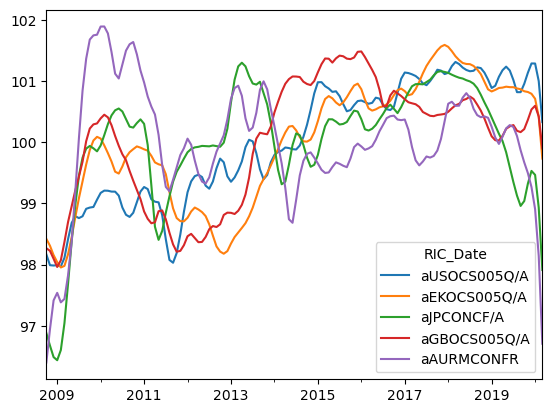

In [84]:
# Normalize CCI

# Adjust Japan and Australia according to OECD consumer confidence indicators
# https://www.oecd.org/sdd/leading-indicators/45430429.pdf

for i in ["aJPCONCF/A", "aAURMCONFR"]:
    cycle, trend = sm.tsa.filters.hpfilter(df[i], 1)
    df[i] = trend

df[rics_var["CCI"]] = df[rics_var["CCI"]].apply(lambda x: (x-x.mean())/x.std()+100)

df[rics_var["CCI"]].plot()
plt.show()

In [85]:
# Change MoM (first difference)
df_us = pd.DataFrame({"Yld1Y_MoM": df["US1YT=RR"].diff()/100,
                      "Yld10Y_MoM": df["US10YT=RR"].diff()/100,
                      "FM_MoM": df["aUSSHRPRCF"].pct_change(),
                      "CPI_MoM": df["aUSCCPIE/CA"].pct_change(),
                      "PPI_MoM": df["aUSCPPIE/CA"].pct_change(),
                      "CCI_MoM": df["aUSOCS005Q/A"].pct_change(),
                      "RS_MoM": df["aUSRSLS/A"].pct_change(),
                      "Gold_MoM": df["XAU="].pct_change(),
                      "M1_MoM": df["aUSCMS1B/A"].pct_change()
                      })

df_eu = pd.DataFrame({"FX_r": df["EUR="].pct_change(),
                      "Yld1Y_MoM": df["EU1YT=RR"].diff()/100,
                      "Yld10Y_MoM": df["EU10YT=RR"].diff()/100,
                      "FM_MoM": df["aFRSHRPRCF/C"].pct_change(),
                      "CPI_MoM": df["aXZCCPIE/CA"].pct_change(),
                      "PPI_MoM": df["aXZCPPIE/CA"].pct_change(),
                      "CCI_MoM": df["aEKOCS005Q/A"].pct_change(),
                      "RS_MoM": df["aXZRSLS/A"].pct_change(),
                      "TB_MoM": df["aUSTBALEU"].pct_change(),
                      "M1_MoM": df["aXZCMS1B/A"].pct_change()
                      })

df_jp = pd.DataFrame({"FX_r": df["JPY="].pct_change(),
                      "Yld1Y_MoM": df["JP1YT=RR"].diff()/100,
                      "Yld10Y_MoM": df["JP10YT=RR"].diff()/100,
                      "FM_MoM": df["aJPSHRPRCF"].pct_change(),
                      "CPI_MoM": df["aJPCCPIE/CA"].pct_change(),
                      "PPI_MoM": df["aJPCPPIE/CA"].pct_change(),
                      "CCI_MoM": df["aJPCONCF/A"].pct_change(),
                      "RS_MoM": df["aJPRSLS/A"].pct_change(),
                      "TB_MoM": df["aUSTBALJP"].pct_change(),
                      "M1_MoM": df["aJPCMS1B/A"].pct_change()
                      })

df_gb = pd.DataFrame({"FX_r": df["GBP="].pct_change(),
                      "Yld1Y_MoM": df["GB1YT=RR"].diff()/100,
                      "Yld10Y_MoM": df["GB10YT=RR"].diff()/100,
                      "FM_MoM": df["aGBSHRPRCF"].pct_change(),
                      "CPI_MoM": df["aGBCCPIE/CA"].pct_change(),
                      "PPI_MoM": df["aGBCPPIE/CA"].pct_change(),
                      "CCI_MoM": df["aGBOCS005Q/A"].pct_change(),
                      "RS_MoM": df["aGBRSLS/A"].pct_change(),
                      "TB_MoM": df["aUSTBALWEU"].pct_change(),
                      "M1_MoM": df["aGBCMS1B/A"].pct_change()
                      })

df_ch = pd.DataFrame({"FX_r": df["CHF="].pct_change(),
                      "Yld1Y_MoM": df["CH1YT=RR"].diff()/100,
                      "Yld10Y_MoM": df["CH10YT=RR"].diff()/100,
                      "FM_MoM": df["aCHSHRPRCF/C"].pct_change(),
                      "CPI_MoM": df["aCHCCPIE/CA"].pct_change(),
                      "PPI_MoM": df["aCHCPPIE/CA"].pct_change(),
                      "CCI_MoM": df["aEKOCS005Q/A"].pct_change(),
                      "RS_MoM": df["aCHRSLS/CA"].pct_change(),
                      "TB_MoM": df["aUSTBALWEU"].pct_change(),
                      "M1_MoM": df["aCHCMS1B/A"].pct_change()
                      })

df_au = pd.DataFrame({"FX_r": df["AUD="].pct_change(),
                      "Yld1Y_MoM": df["AU1YT=RR"].diff()/100,
                      "Yld10Y_MoM": df["AU10YT=RR"].diff()/100,
                      "FM_MoM": df["aAUSHRPRCF/C"].pct_change(),
                      "CPI_MoM": df["aAUCCPIE/CA"].pct_change(),
                      "PPI_MoM": df["aAUCPPIE/CA"].pct_change(),
                      "CCI_MoM": df["aAURMCONFR"].pct_change(),
                      "RS_MoM": df["aAURSLSM/A"].pct_change(),
                      "TB_MoM": df["aUSBTPCASA"].pct_change(),
                      "M1_MoM": df["aAUCMS1B/A"].pct_change()
                      })

In [86]:
# Macroeconomic differential: Domestic - Foreign
def macro_diff (df):
    ret = pd.DataFrame({"FX_r": df["FX_r"],
                        "Yld1Y_MoM": df_us["Yld1Y_MoM"] - df["Yld1Y_MoM"],
                        "Yld10Y_MoM": df_us["Yld10Y_MoM"] - df["Yld10Y_MoM"],
                        "FM_MoM": df_us["FM_MoM"] - df["FM_MoM"],
                        "CPI_MoM": df_us["CPI_MoM"] - df["CPI_MoM"],
                        "PPI_MoM": df_us["PPI_MoM"] - df["PPI_MoM"],
                        "CCI_MoM": df_us["CCI_MoM"] - df["CCI_MoM"],
                        "RS_MoM": df_us["RS_MoM"] - df["RS_MoM"],
                        "TB_MoM": df["TB_MoM"],
                        "Gold_MoM": df_us["Gold_MoM"],
                        "M1_MoM": df_us["M1_MoM"] - df["M1_MoM"]
                          })
    return ret

df_eu_diff = macro_diff(df_eu)["2008-12":"2019-12"]
df_jp_diff = macro_diff(df_jp)["2008-12":"2019-12"]
df_gb_diff = macro_diff(df_gb)["2008-12":"2019-12"]
df_ch_diff = macro_diff(df_ch)["2008-12":"2019-12"]
df_au_diff = macro_diff(df_au)["2008-12":"2019-12"]

In [87]:
# Plot transformed data
name_ls = ["EUR", "JPY", "GBP", "CHF", "AUD"]
data_ls = [df_eu_diff, df_jp_diff, df_gb_diff, df_ch_diff, df_au_diff]
for i in range(len(data_ls)):
    print("\n")
    for j in data_ls[i].columns:
        print(f"plotting {name_ls[i]} {j}")
        fig, ax = plt.subplots(figsize=(14, 6))
        ax.plot(data_ls[i][j], alpha=0.9, color='blue')
        plt.title(f"{name_ls[i]}: {j}")
        plt.savefig(f"Charts\Transformed Data\{name_ls[i]}\Plot_{j}.png")
        plt.close()



plotting EUR FX_r
plotting EUR Yld1Y_MoM
plotting EUR Yld10Y_MoM
plotting EUR FM_MoM
plotting EUR CPI_MoM
plotting EUR PPI_MoM
plotting EUR CCI_MoM
plotting EUR RS_MoM
plotting EUR TB_MoM
plotting EUR Gold_MoM
plotting EUR M1_MoM


plotting JPY FX_r
plotting JPY Yld1Y_MoM
plotting JPY Yld10Y_MoM
plotting JPY FM_MoM
plotting JPY CPI_MoM
plotting JPY PPI_MoM
plotting JPY CCI_MoM
plotting JPY RS_MoM
plotting JPY TB_MoM
plotting JPY Gold_MoM
plotting JPY M1_MoM


plotting GBP FX_r
plotting GBP Yld1Y_MoM
plotting GBP Yld10Y_MoM
plotting GBP FM_MoM
plotting GBP CPI_MoM
plotting GBP PPI_MoM
plotting GBP CCI_MoM
plotting GBP RS_MoM
plotting GBP TB_MoM
plotting GBP Gold_MoM
plotting GBP M1_MoM


plotting CHF FX_r
plotting CHF Yld1Y_MoM
plotting CHF Yld10Y_MoM
plotting CHF FM_MoM
plotting CHF CPI_MoM
plotting CHF PPI_MoM
plotting CHF CCI_MoM
plotting CHF RS_MoM
plotting CHF TB_MoM
plotting CHF Gold_MoM
plotting CHF M1_MoM


plotting AUD FX_r
plotting AUD Yld1Y_MoM
plotting AUD Yld10Y_MoM
plott

## Pre analysis

In [88]:
# Heatmap
name_ls = ["EUR", "JPY", "GBP", "CHF", "AUD"]
data_ls = [df_eu_diff, df_jp_diff, df_gb_diff, df_ch_diff, df_au_diff]
for i in range(len(data_ls)):
        print(f"plotting {name_ls[i]} Heatmap")
        fig, ax = plt.subplots(figsize=(10, 10))
        corr = data_ls[i].corr()
        ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
        plt.title(f"Heatmap: {name_ls[i]}")
        plt.savefig(f"Charts\Transformed Data\Heatmap\Plot_{name_ls[i]}.png")
        plt.close()

plotting EUR Heatmap
plotting JPY Heatmap
plotting GBP Heatmap
plotting CHF Heatmap
plotting AUD Heatmap


In [89]:
# Descriptive statistics
def desc_stats (df):
    ret = pd.DataFrame({"Count": df.count(),
                        "Mean": df.mean(),
                        "Std": df.std(),
                        "Kurtosis": df.kurtosis(),
                        "Skew": df.skew(),
                        "Prob (Shapiro-Wilks)": df.apply(lambda x: sp.stats.shapiro(x)[1]),
                        "Prob (ADF)": df.apply(lambda x: adfuller(x)[1]),
                        "Prob (Ljung-Box: 1)": df.apply(lambda x: acf(x, qstat=True)[-1][0]),
                        "Prob (Ljung-Box: 3)": df.apply(lambda x: acf(x, qstat=True)[-1][2]),
                        "Prob (Ljung-Box: 6)": df.apply(lambda x: acf(x, qstat=True)[-1][5]),
                        "Prob (Ljung-Box: 9)": df.apply(lambda x: acf(x, qstat=True)[-1][8]),
                        "Prob (Ljung-Box: 12)": df.apply(lambda x: acf(x, qstat=True)[-1][11])
                        })
    return ret.transpose()

In [90]:
round(desc_stats(df_eu_diff), 3)

,FX_r,Yld1Y_MoM,Yld10Y_MoM,FM_MoM,CPI_MoM,PPI_MoM,CCI_MoM,RS_MoM,TB_MoM,Gold_MoM,M1_MoM
Count,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000
Mean,-0.001,0.000,0.000,0.004,0.000,0.001,0.000,0.002,0.039,0.006,0.002
Std,0.029,0.002,0.001,0.040,0.002,0.005,0.002,0.009,0.265,0.048,0.028
Kurtosis,1.551,5.595,0.467,0.542,1.036,1.855,0.116,0.528,1.172,-0.016,1.066
Skew,0.014,-0.040,0.108,0.429,-0.007,0.869,-0.176,-0.236,0.803,0.134,0.353
Prob (Shapiro-Wilks),0.010,0.000,0.514,0.249,0.423,0.000,0.772,0.506,0.001,0.743,0.023
Prob (ADF),0.000,0.043,0.000,0.000,0.000,0.000,0.000,0.000,0.121,0.000,0.001
Prob (Ljung-Box: 1),0.095,0.655,0.006,0.006,0.444,0.857,0.000,0.000,0.001,0.129,0.071
Prob (Ljung-Box: 3),0.222,0.222,0.018,0.054,0.484,0.081,0.000,0.001,0.000,0.417,0.055
Prob (Ljung-Box: 6),0.305,0.547,0.011,0.006,0.433,0.063,0.000,0.004,0.000,0.228,0.009


In [91]:
round(desc_stats(df_jp_diff), 3)

,FX_r,Yld1Y_MoM,Yld10Y_MoM,FM_MoM,CPI_MoM,PPI_MoM,CCI_MoM,RS_MoM,TB_MoM,Gold_MoM,M1_MoM
Count,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000
Mean,0.001,0.000,0.000,0.003,0.001,0.001,0.000,0.003,0.020,0.006,0.004
Std,0.028,0.001,0.002,0.040,0.003,0.006,0.002,0.025,0.214,0.048,0.029
Kurtosis,1.072,2.759,0.990,0.540,9.495,2.393,0.896,15.047,3.899,-0.016,0.389
Skew,0.495,-0.487,0.092,0.208,-1.441,0.477,-0.267,2.328,1.160,0.134,0.201
Prob (Shapiro-Wilks),0.022,0.000,0.033,0.523,0.000,0.001,0.086,0.000,0.000,0.743,0.297
Prob (ADF),0.000,0.074,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000
Prob (Ljung-Box: 1),0.811,0.885,0.261,0.907,0.039,0.709,0.000,0.000,0.000,0.129,0.258
Prob (Ljung-Box: 3),0.922,0.004,0.414,0.695,0.228,0.451,0.000,0.000,0.000,0.417,0.319
Prob (Ljung-Box: 6),0.866,0.001,0.719,0.919,0.093,0.487,0.000,0.000,0.000,0.228,0.356


In [92]:
round(desc_stats(df_gb_diff), 3)

,FX_r,Yld1Y_MoM,Yld10Y_MoM,FM_MoM,CPI_MoM,PPI_MoM,CCI_MoM,RS_MoM,TB_MoM,Gold_MoM,M1_MoM
Count,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000
Mean,-0.001,0.000,0.000,0.004,-0.000,0.000,0.000,0.001,0.040,0.006,0.004
Std,0.025,0.001,0.001,0.026,0.002,0.005,0.002,0.011,0.267,0.048,0.026
Kurtosis,1.110,3.913,0.119,0.218,0.116,0.403,0.151,0.098,1.172,-0.016,1.056
Skew,0.109,0.317,-0.020,0.205,-0.117,0.219,-0.229,-0.366,0.811,0.134,0.177
Prob (Shapiro-Wilks),0.222,0.000,0.759,0.816,0.482,0.477,0.512,0.128,0.002,0.743,0.098
Prob (ADF),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000
Prob (Ljung-Box: 1),0.547,0.001,0.002,0.040,0.573,0.548,0.000,0.000,0.000,0.129,0.045
Prob (Ljung-Box: 3),0.797,0.002,0.022,0.205,0.522,0.628,0.000,0.000,0.000,0.417,0.027
Prob (Ljung-Box: 6),0.371,0.003,0.098,0.332,0.241,0.087,0.000,0.000,0.000,0.228,0.001


In [93]:
round(desc_stats(df_ch_diff), 3)

,FX_r,Yld1Y_MoM,Yld10Y_MoM,FM_MoM,CPI_MoM,PPI_MoM,CCI_MoM,RS_MoM,TB_MoM,Gold_MoM,M1_MoM
Count,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000
Mean,-0.001,0.000,0.000,0.002,0.001,0.002,0.000,0.003,0.040,0.006,-0.001
Std,0.031,0.002,0.002,0.027,0.002,0.006,0.002,0.016,0.267,0.048,0.034
Kurtosis,3.524,9.702,2.843,-0.243,1.390,0.812,0.116,0.599,1.172,-0.016,4.972
Skew,0.116,0.251,0.013,0.111,-0.028,-0.316,-0.176,0.020,0.811,0.134,-0.909
Prob (Shapiro-Wilks),0.000,0.000,0.001,0.858,0.037,0.039,0.772,0.317,0.002,0.743,0.000
Prob (ADF),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000
Prob (Ljung-Box: 1),0.022,0.012,0.116,0.257,0.664,0.508,0.000,0.000,0.000,0.129,0.017
Prob (Ljung-Box: 3),0.065,0.015,0.017,0.066,0.547,0.629,0.000,0.000,0.000,0.417,0.006
Prob (Ljung-Box: 6),0.180,0.054,0.017,0.128,0.755,0.799,0.000,0.000,0.000,0.228,0.032


In [94]:
round(desc_stats(df_au_diff), 3)

,FX_r,Yld1Y_MoM,Yld10Y_MoM,FM_MoM,CPI_MoM,PPI_MoM,CCI_MoM,RS_MoM,TB_MoM,Gold_MoM,M1_MoM
Count,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000,133.000
Mean,0.001,0.000,0.000,0.005,-0.000,0.000,0.000,0.000,0.026,0.006,-0.002
Std,0.036,0.002,0.002,0.030,0.002,0.006,0.003,0.011,0.215,0.048,0.038
Kurtosis,0.943,1.724,2.185,0.241,2.705,1.351,0.952,8.961,1.151,-0.016,0.714
Skew,0.139,0.222,0.265,-0.506,-0.431,-0.299,-0.580,-1.808,0.704,0.134,-0.288
Prob (Shapiro-Wilks),0.038,0.002,0.001,0.025,0.000,0.030,0.013,0.000,0.007,0.743,0.130
Prob (ADF),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Prob (Ljung-Box: 1),0.332,0.515,0.078,0.014,0.052,0.438,0.000,0.293,0.000,0.129,0.238
Prob (Ljung-Box: 3),0.753,0.915,0.176,0.065,0.088,0.338,0.000,0.650,0.000,0.417,0.668
Prob (Ljung-Box: 6),0.213,0.449,0.497,0.029,0.087,0.374,0.000,0.703,0.000,0.228,0.088


## Main Analysis

In [95]:
# Input
# Model with all variables
lm1 = "FX_r ~ Yld1Y_MoM + Yld10Y_MoM + FM_MoM + CPI_MoM + PPI_MoM + CCI_MoM + RS_MoM + TB_MoM + Gold_MoM + M1_MoM"
# Model with no polling data
lm2 = "FX_r ~ Yld1Y_MoM + Yld10Y_MoM + FM_MoM + Gold_MoM + M1_MoM"
# Frenkel model
lm3 = "FX_r ~ Yld1Y_MoM + Yld10Y_MoM + CPI_MoM + M1_MoM"
# Only real economy
lm4 = "FX_r ~ CPI_MoM + PPI_MoM + CCI_MoM + RS_MoM + TB_MoM"
# Safe Haven Assets
lm5 = "FX_r ~ Yld1Y_MoM + Yld10Y_MoM + CCI_MoM + Gold_MoM"

name_ls = ["EUR", "JPY", "GBP", "CHF", "AUD"]
model_ls = [lm1, lm2, lm3, lm4, lm5]
data_ls = [df_eu_diff, df_jp_diff, df_gb_diff, df_ch_diff, df_au_diff]
train_split = "2016-12-31"

# Output containers
df_results = pd.DataFrame()
df_analysis = pd.DataFrame()

# Summary functions
def in_sample_stats (lm):
    ret = pd.DataFrame({"Rsquared": [lm.rsquared],
                        "AIC": [lm.aic],
                        "BIC": [lm.aic],
                        "Prob (F-statistic)": [lm.f_pvalue],
                        "Durbin-Watson": [durbin_watson(lm.resid)],
                        "Prob(Jarque-Bera)": [jarque_bera(lm.resid)[1]],
                        "Prob(Breusch-Pagan)": [het_breuschpagan(lm.resid, lm.model.exog)[3]]
                        })
    return ret.transpose()

def out_sample_stats (pred):
    ret = pd.DataFrame({"Mean squared error": [np.mean((pred["y"]-pred["y_hat"])**2)],
                        "Sign mean squared error": [np.mean((np.sign(pred["y"])-np.sign(pred["y_hat"]))**2)]
                        })
    return ret.transpose()

def beta_stats (df):
    ret = pd.DataFrame({"Count": df.count(),
                        "Mean": df.mean(),
                        "Std": df.std(),
                        "Kurtosis": df.kurtosis(),
                        "Skew": df.skew(),
                        "Prob (Shapiro-Wilks)": df.apply(lambda x: sp.stats.shapiro(x)[1]),
                        "Prob (ADF)": df.apply(lambda x: adfuller(x)[1]),
                        })
    return ret.transpose()

In [96]:
# Loop
for i in range(len(data_ls)):
    # Split data into in/out-of-samples and shift independent variables by one time unit
    df_lm = data_ls[i].copy()
    df_lm.iloc[:,1::] = df_lm.iloc[:,1::].shift()
    df_lm = df_lm.dropna()
    df_in = df_lm[:train_split]
    df_out = df_lm[train_split:]
    
    ## Benchmark (randomwalk)
    # Model
    lm = df_lm.iloc[:,0].shift()[train_split:]
    
    ## Record results
    pred = lm
    res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                        "Model": "Benchmark",
                        "Type": "Predictions",
                        "Value": pred})
    df_results = pd.concat([df_results, res])
   
    ## Record analysis
    # Out-of-sample, forecast performance
    pred = pd.DataFrame({"y": df_out["FX_r"],
                         "y_hat": lm})
    pred = out_sample_stats(pred).reset_index()
    
    res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                        "Model": "Benchmark",
                        "Result_Type": "Predictions",
                        "Analysis_Type": pred["index"],
                        "Value": pred[0]})
    df_analysis = pd.concat([df_analysis, res])
    
    # Plot
    pred = pd.DataFrame({"y": df_out["FX_r"],
                         "y_hat": lm})
    
    print("\n", f"plotting {name_ls[i]} benchmark")
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(pred)
    plt.legend(["y", "y_hat"])
    plt.title(f"Out-of-Sample: FX-{name_ls[i]} Benchmark")
    plt.savefig(f"Charts\Results\{name_ls[i]}_static\Plot_benchmark.png")
    plt.close()
    
    for j in range(len(model_ls)):
        ## Ordinary regression
        # Fit in-sample model
        lm = smf.ols(model_ls[j], data=df_in).fit()
        
        ## Record results
        # Predictions
        pred = lm.predict(df_out.iloc[:,1::])
        res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                            "Model": f"Model_{j+1}_static",
                            "Type": "Predictions",
                            "Value": pred})
        df_results = pd.concat([df_results, res])
        
        # Betas
        pred = lm.params.reset_index()
        pred["index"] = "beta_" + pred["index"]
        pred.index = np.repeat(np.datetime64(train_split), len(pred))
        
        res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                            "Model": f"Model_{j+1}_static",
                            "Type": pred["index"],
                            "Value": pred[0]})
        df_results = pd.concat([df_results, res])
        
        # Residuals
        pred = lm.resid
        res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                            "Model": f"Model_{j+1}_static",
                            "Type": "Residuals",
                            "Value": pred})
        df_results = pd.concat([df_results, res])
        
        ## Record analysis
        # In-sample, goodness of fit
        pred = in_sample_stats(lm).reset_index()
        res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                            "Model": f"Model_{j+1}_static",
                            "Result_Type": "Residuals",
                            "Analysis_Type": pred["index"],
                            "Value": pred[0]})
        df_analysis = pd.concat([df_analysis, res])
        
        # Out-of-sample, forecast performance
        pred = pd.DataFrame({"y": df_out["FX_r"],
                             "y_hat": lm.predict(df_out.iloc[:,1::])})
        pred = out_sample_stats(pred).reset_index()
        
        res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                            "Model": f"Model_{j+1}_static",
                            "Result_Type": "Predictions",
                            "Analysis_Type": pred["index"],
                            "Value": pred[0]})
        df_analysis = pd.concat([df_analysis, res])

        # Plot
        pred = pd.DataFrame({"y": df_out["FX_r"],
                             "y_hat": lm.predict(df_out.iloc[:,1::])})
        
        print(f"plotting {name_ls[i]} lm{j+1}")
        fig, ax = plt.subplots(figsize=(14, 6))
        ax.plot(pred)
        plt.legend(["y", "y_hat"])
        plt.title(f"Out-of-Sample: FX-{name_ls[i]} Model {j+1}")
        plt.savefig(f"Charts\Results\{name_ls[i]}_static\Plot_model_{j+1}.png")
        plt.close()
        
        ## Rolling Regression
        lm_rol = RollingOLS.from_formula(model_ls[j], data=df_in, window=30).fit()
        
        ## Record results
        # Betas
        pred = lm_rol.params.dropna()
        pred = pd.melt(pred, ignore_index=False)
        pred["variable"] = "beta_" + pred["variable"]
        
        res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                            "Model": f"Model_{j+1}_rolling",
                            "Type": pred["variable"],
                            "Value": pred["value"]})
        df_results = pd.concat([df_results, res])
        
        ## Record analysis
        # Beta statistics
        pred = lm_rol.params.dropna()
        pred = beta_stats(pred).reset_index()
        pred = pd.melt(pred, id_vars="index")
        pred["variable"] = "beta_" + pred["variable"]
        
        res = pd.DataFrame({"Dependent_Variable": name_ls[i],
                            "Model": f"Model_{j+1}_rolling",
                            "Result_Type": pred["variable"],
                            "Analysis_Type": pred["index"],
                            "Value": pred["value"]})
        df_analysis = pd.concat([df_analysis, res])
        
        # Plot
        print(f"plotting {name_ls[i]} lm_rol{j+1}")
        plot_var = list(lm_rol.params.columns.values)
        fig, ax = plt.subplots(figsize=(14, 6*len(plot_var)))
        lm_rol.plot_recursive_coefficient(variables=plot_var, fig=fig)        
        plt.savefig(f"Charts\Results\{name_ls[i]}_rolling\Plot_model_{j+1}.png")
        plt.close()


 plotting EUR benchmark
plotting EUR lm1
plotting EUR lm_rol1
plotting EUR lm2
plotting EUR lm_rol2
plotting EUR lm3
plotting EUR lm_rol3
plotting EUR lm4
plotting EUR lm_rol4
plotting EUR lm5
plotting EUR lm_rol5

 plotting JPY benchmark
plotting JPY lm1
plotting JPY lm_rol1
plotting JPY lm2
plotting JPY lm_rol2
plotting JPY lm3
plotting JPY lm_rol3
plotting JPY lm4
plotting JPY lm_rol4
plotting JPY lm5
plotting JPY lm_rol5

 plotting GBP benchmark
plotting GBP lm1
plotting GBP lm_rol1
plotting GBP lm2
plotting GBP lm_rol2
plotting GBP lm3
plotting GBP lm_rol3
plotting GBP lm4
plotting GBP lm_rol4
plotting GBP lm5
plotting GBP lm_rol5

 plotting CHF benchmark
plotting CHF lm1
plotting CHF lm_rol1
plotting CHF lm2
plotting CHF lm_rol2
plotting CHF lm3
plotting CHF lm_rol3
plotting CHF lm4
plotting CHF lm_rol4
plotting CHF lm5
plotting CHF lm_rol5

 plotting AUD benchmark
plotting AUD lm1
plotting AUD lm_rol1
plotting AUD lm2
plotting AUD lm_rol2
plotting AUD lm3
plotting AUD lm_rol3
p

In [97]:
df_results.head()

,Dependent_Variable,Model,Type,Value
2016-12-31,EUR,Benchmark,Predictions,-0.035887
2017-01-31,EUR,Benchmark,Predictions,-0.006802
2017-02-28,EUR,Benchmark,Predictions,0.026824
2017-03-31,EUR,Benchmark,Predictions,-0.020380
2017-04-30,EUR,Benchmark,Predictions,0.006998


In [98]:
df_analysis.head()

,Dependent_Variable,Model,Result_Type,Analysis_Type,Value
0,EUR,Benchmark,Predictions,Mean squared error,0.000628
1,EUR,Benchmark,Predictions,Sign mean squared error,2.054054
0,EUR,Model_1_static,Residuals,Rsquared,0.210788
1,EUR,Model_1_static,Residuals,AIC,-399.744086
2,EUR,Model_1_static,Residuals,BIC,-399.744086


## Key statistics of the main analysis

In [99]:
## Ordinary regression
# In-sample, goodness of fit
round(pd.pivot(df_analysis[df_analysis["Result_Type"] == "Residuals"],
               index=["Dependent_Variable", "Model"], columns="Analysis_Type", values="Value"), 3)

Analysis_Type                          AIC      BIC  Durbin-Watson  \
Dependent_Variable Model                                             
AUD                Model_1_static -344.737 -344.737          1.864   
                   Model_2_static -344.638 -344.638          1.844   
                   Model_3_static -347.469 -347.469          1.892   
                   Model_4_static -352.471 -352.471          2.001   
                   Model_5_static -345.568 -345.568          1.917   
CHF                Model_1_static -380.769 -380.769          1.787   
                   Model_2_static -386.463 -386.463          1.875   
                   Model_3_static -386.508 -386.508          1.882   
                   Model_4_static -379.939 -379.939          2.151   
                   Model_5_static -386.018 -386.018          2.014   
EUR                Model_1_static -399.744 -399.744          1.807   
                   Model_2_static -405.568 -405.568          1.705   
                   Model_3_static -399.586 -399.586          1.882   
                   Model_4_static -393.344 -393.344          2.164   
                   Model_5_static -397.747 -397.747          1.974   
GBP                Model_1_static -413.851 -413.851          1.948   
                   Model_2_static -420.537 -420.537          1.884   
                   Model_3_static -421.531 -421.531          1.898   
                   Model_4_static -418.894 -418.894          2.101   
                   Model_5_static -422.203 -422.203          2.080   
JPY                Model_1_static -385.903 -385.903          1.902   
                   Model_2_static -392.861 -392.861          1.906   
                   Model_3_static -390.871 -390.871          1.897   
                   Model_4_static -388.242 -388.242          1.908   
                   Model_5_static -391.754 -391.754          1.808   

Analysis_Type                      Prob (F-statistic)  Prob(Breusch-Pagan)  \
Dependent_Variable Model                                                     
AUD                Model_1_static               0.227                0.865   
                   Model_2_static               0.595                0.934   
                   Model_3_static               0.342                0.418   
                   Model_4_static               0.048                0.520   
                   Model_5_static               0.612                0.784   
CHF                Model_1_static               0.192                0.007   
                   Model_2_static               0.078                0.000   
                   Model_3_static               0.089                0.006   
                   Model_4_static               0.596                0.557   
                   Model_5_static               0.107                0.004   
EUR                Model_1_static               0.021                0.594   
                   Model_2_static               0.003                0.331   
                   Model_3_static               0.038                0.270   
                   Model_4_static               0.304                0.447   
                   Model_5_static               0.079                0.348   
GBP                Model_1_static               0.709                0.859   
                   Model_2_static               0.518                0.842   
                   Model_3_static               0.512                0.886   
                   Model_4_static               0.753                0.914   
                   Model_5_static               0.416                0.801   
JPY                Model_1_static               0.506                0.884   
                   Model_2_static               0.248                0.768   
                   Model_3_static               0.581                0.574   
                   Model_4_static               0.814                0.198   
                   Model_5_static               0.447                0.657   

An

In [100]:
# Out-of-sample, forecast performance
round(pd.pivot(df_analysis[df_analysis["Result_Type"] == "Predictions"],
               index=["Dependent_Variable", "Model"], columns="Analysis_Type", values="Value")*100**2, 3)

Analysis_Type                      Mean squared error  Sign mean squared error
Dependent_Variable Model                                                      
AUD                Benchmark                   13.211                23243.243
                   Model_1_static               5.847                20810.811
                   Model_2_static               5.188                17567.568
                   Model_3_static               5.763                18648.649
                   Model_4_static               6.407                24054.054
                   Model_5_static               5.663                21891.892
CHF                Benchmark                    7.587                24864.865
                   Model_1_static               4.118                11891.892
                   Model_2_static               3.400                15135.135
                   Model_3_static               3.579                18378.378
                   Model_4_static               3.892                19459.459
                   Model_5_static               3.404                15135.135
EUR                Benchmark                    6.281                20540.541
                   Model_1_static               3.958                21621.622
                   Model_2_static               3.771                20540.541
                   Model_3_static               4.854                22702.703
                   Model_4_static               3.311                17297.297
                   Model_5_static               3.823                20540.541
GBP                Benchmark                   11.592                26486.486
                   Model_1_static               5.532                19729.730
                   Model_2_static               5.059                17567.568
                   Model_3_static               5.239                19729.730
                   Model_4_static               5.278                25135.135
                   Model_5_static               5.274                22972.973
JPY                Benchmark                    7.788                29189.189
                   Model_1_static               3.259                21621.622
                   Model_2_static               3.220                25945.946
                   Model_3_static               3.156                23783.784
                   Model_4_static               3.084                22702.703
                   Model_5_static               3.203                24864.865

In [101]:
## Rolling Regression
# Beta statistics
round(pd.pivot(df_analysis[(df_analysis["Result_Type"].str.contains("beta_")) & (df_analysis["Dependent_Variable"]=="EUR")],
               index=["Model", "Result_Type"], columns="Analysis_Type", values="Value"), 3)

Analysis_Type                    Count  Kurtosis   Mean  Prob (ADF)  \
Model           Result_Type                                           
Model_1_rolling beta_CCI_MoM      67.0    -1.322 -2.590       0.400   
                beta_CPI_MoM      67.0    -0.382 -0.893       0.005   
                beta_FM_MoM       67.0    -0.197 -0.254       0.952   
                beta_Gold_MoM     67.0    -0.489 -0.056       0.144   
                beta_Intercept    67.0    -1.166 -0.003       0.793   
                beta_M1_MoM       67.0    -0.143  0.118       0.076   
                beta_PPI_MoM      67.0    -1.170  0.629       0.197   
                beta_RS_MoM       67.0     1.445  0.222       0.970   
                beta_TB_MoM       67.0    -0.517  0.007       0.124   
                beta_Yld10Y_MoM   67.0    -0.399 -0.112       0.972   
                beta_Yld1Y_MoM    67.0     0.548 -2.448       0.012   
Model_2_rolling beta_FM_MoM       67.0    -0.294 -0.276       0.887   
                beta_Gold_MoM     67.0     4.063 -0.059       0.008   
                beta_Intercept    67.0    -0.614 -0.002       0.808   
                beta_M1_MoM       67.0     0.678  0.094       0.093   
                beta_Yld10Y_MoM   67.0    -0.144  0.759       0.934   
                beta_Yld1Y_MoM    67.0     0.155 -3.935       0.373   
Model_3_rolling beta_CPI_MoM      67.0    -0.249  1.876       0.345   
                beta_Intercept    67.0    -0.270 -0.005       0.735   
                beta_M1_MoM       67.0    -1.117  0.272       0.627   
                beta_Yld10Y_MoM   67.0    -0.698  3.298       0.973   
                beta_Yld1Y_MoM    67.0     0.426 -6.909       0.622   
Model_4_rolling beta_CCI_MoM      67.0    -0.863 -2.623       0.408   
                beta_CPI_MoM      67.0    -1.008 -2.598       0.076   
                beta_Intercept    67.0    -1.074 -0.004       0.641   
                beta_PPI_MoM      67.0    -1.273  1.281       0.016   
                beta_RS_MoM       67.0    -0.021  0.354       0.916   
                beta_TB_MoM       67.0     0.621 -0.003       0.083   
Model_5_rolling beta_CCI_MoM      67.0    -1.118 -2.540       0.332   
                beta_Gold_MoM     67.0     0.058 -0.061       0.258   
                beta_Intercept    67.0    -0.931 -0.003       0.675   
                beta_Yld10Y_MoM   67.0    -0.892  2.999       0.961   
                beta_Yld1Y_MoM    67.0     0.407 -2.752       0.903   

Analysis_Type                    Prob (Shapiro-Wilks)   Skew    Std  
Model           Result_Type                                          
Model_1_rolling beta_CCI_MoM                    0.000  0.135  2.321  
                beta_CPI_MoM                    0.054  0.164  2.268  
                beta_FM_MoM                     0.000  0.901  0.168  
                beta_Gold_MoM                   0.439 -0.248  0.059  
                beta_Intercept                  0.000 -0.274  0.007  
                beta_M1_MoM                     0.017 -0.641  0.088  
                beta_PPI_MoM                    0.007 -0.024  1.059  
                beta_RS_MoM                     0.000  1.361  0.796  
                beta_TB_MoM                     0.559  0.052  0.014  
                beta_Yld10Y_MoM                 0.000 -0.899  6.186  
                beta_Yld1Y_MoM                  0.000  1.059  7.406  
Model_2_rolling beta_FM_MoM                     0.008  0.553  0.137  
                beta_Gold_MoM                   0.000 -1.690  0.039  
                beta_Intercept                  0.700  0.058  0.005  
                beta_M1_MoM                     0.011 -0.630  0.091  
                beta_Yld10Y_MoM                 0.000 -1.116  4.644  
                beta_Yld1Y_MoM                  0.000  0.313  6.509  
Model_3_rolling beta_CPI_MoM                    0.001  0.767  2.442  
                beta_Intercept                  0.006 -0.508  0.004  
                beta_M1_MoM                 

In [102]:
round(pd.pivot(df_analysis[(df_analysis["Result_Type"].str.contains("beta_")) & (df_analysis["Dependent_Variable"]=="JPY")],
               index=["Model", "Result_Type"], columns="Analysis_Type", values="Value"), 3)

Analysis_Type                    Count  Kurtosis   Mean  Prob (ADF)  \
Model           Result_Type                                           
Model_1_rolling beta_CCI_MoM      67.0     4.253  1.330       0.927   
                beta_CPI_MoM      67.0    -0.987 -0.720       0.276   
                beta_FM_MoM       67.0    -0.941 -0.146       0.031   
                beta_Gold_MoM     67.0     3.960  0.078       0.995   
                beta_Intercept    67.0    -0.733  0.005       0.539   
                beta_M1_MoM       67.0     2.464 -0.067       0.376   
                beta_PPI_MoM      67.0     0.441 -0.213       0.840   
                beta_RS_MoM       67.0     0.279  0.122       0.225   
                beta_TB_MoM       67.0     0.458  0.003       0.054   
                beta_Yld10Y_MoM   67.0    -0.050 -0.118       0.268   
                beta_Yld1Y_MoM    67.0     1.399 -7.946       0.125   
Model_2_rolling beta_FM_MoM       67.0    -1.234 -0.107       0.467   
                beta_Gold_MoM     67.0     0.934  0.087       0.642   
                beta_Intercept    67.0    -0.112  0.003       0.103   
                beta_M1_MoM       67.0    -0.059  0.034       0.936   
                beta_Yld10Y_MoM   67.0    -0.722 -0.251       0.827   
                beta_Yld1Y_MoM    67.0     1.295 -6.174       0.138   
Model_3_rolling beta_CPI_MoM      67.0     1.726 -0.796       0.325   
                beta_Intercept    67.0    -0.818  0.004       0.409   
                beta_M1_MoM       67.0    -0.711  0.097       0.329   
                beta_Yld10Y_MoM   67.0     0.189 -0.184       0.907   
                beta_Yld1Y_MoM    67.0     0.238 -8.105       0.098   
Model_4_rolling beta_CCI_MoM      67.0    -1.157 -0.113       0.717   
                beta_CPI_MoM      67.0    -1.159 -0.965       0.427   
                beta_Intercept    67.0    -1.267  0.005       0.260   
                beta_PPI_MoM      67.0    -0.233 -0.026       0.583   
                beta_RS_MoM       67.0     7.584  0.020       0.962   
                beta_TB_MoM       67.0     0.155  0.000       0.390   
Model_5_rolling beta_CCI_MoM      67.0    -0.281 -0.188       0.650   
                beta_Gold_MoM     67.0     1.832  0.068       0.019   
                beta_Intercept    67.0    -0.942  0.004       0.225   
                beta_Yld10Y_MoM   67.0    -0.149  0.306       0.671   
                beta_Yld1Y_MoM    67.0     0.105 -7.473       0.165   

Analysis_Type                    Prob (Shapiro-Wilks)   Skew     Std  
Model           Result_Type                                           
Model_1_rolling beta_CCI_MoM                    0.000  2.110   3.092  
                beta_CPI_MoM                    0.006  0.330   2.744  
                beta_FM_MoM                     0.001 -0.386   0.229  
                beta_Gold_MoM                   0.000 -1.571   0.131  
                beta_Intercept                  0.000 -0.819   0.009  
                beta_M1_MoM                     0.000 -1.506   0.397  
                beta_PPI_MoM                    0.052 -0.662   1.514  
                beta_RS_MoM                     0.000  0.795   0.232  
                beta_TB_MoM                     0.000 -1.035   0.017  
                beta_Yld10Y_MoM                 0.014  0.636   4.114  
                beta_Yld1Y_MoM                  0.008 -0.660  13.299  
Model_2_rolling beta_FM_MoM                     0.006  0.117   0.129  
                beta_Gold_MoM                   0.010  0.481   0.078  
                beta_Intercept                  0.000 -1.014   0.007  
                beta_M1_MoM                     0.016 -0.470   0.197  
                beta_Yld10Y_MoM                 0.038 -0.325   2.780  
                beta_Yld1Y_MoM                  0.002 -0.911   8.741  
Model_3_rolling beta_CPI_MoM                    0.001 -1.018   1.324  
                beta_Intercept                  0.000 -0.598   0.006  
                beta_M1

In [103]:
round(pd.pivot(df_analysis[(df_analysis["Result_Type"].str.contains("beta_")) & (df_analysis["Dependent_Variable"]=="GBP")],
               index=["Model", "Result_Type"], columns="Analysis_Type", values="Value"), 3)

Analysis_Type                    Count  Kurtosis   Mean  Prob (ADF)  \
Model           Result_Type                                           
Model_1_rolling beta_CCI_MoM      67.0    -0.998 -1.965       0.342   
                beta_CPI_MoM      67.0    -0.791  1.252       0.003   
                beta_FM_MoM       67.0    -0.721 -0.106       0.689   
                beta_Gold_MoM     67.0    -1.555  0.017       0.850   
                beta_Intercept    67.0     0.785 -0.001       0.950   
                beta_M1_MoM       67.0     1.544  0.150       0.000   
                beta_PPI_MoM      67.0     1.838 -0.171       0.471   
                beta_RS_MoM       67.0    -0.682 -0.060       0.610   
                beta_TB_MoM       67.0     3.018 -0.000       0.832   
                beta_Yld10Y_MoM   67.0    -0.254  5.489       0.109   
                beta_Yld1Y_MoM    67.0    -0.726 -4.023       0.467   
Model_2_rolling beta_FM_MoM       67.0    -1.225 -0.105       0.080   
                beta_Gold_MoM     67.0    -1.460  0.009       0.887   
                beta_Intercept    67.0     1.410 -0.000       0.910   
                beta_M1_MoM       67.0    -0.759  0.101       0.522   
                beta_Yld10Y_MoM   67.0    -0.559  3.362       0.146   
                beta_Yld1Y_MoM    67.0     0.282 -3.683       0.153   
Model_3_rolling beta_CPI_MoM      67.0    -1.043  0.540       0.127   
                beta_Intercept    67.0     0.268 -0.001       0.633   
                beta_M1_MoM       67.0    -0.256  0.128       0.028   
                beta_Yld10Y_MoM   67.0    -0.867  3.426       0.324   
                beta_Yld1Y_MoM    67.0    -0.018 -4.546       0.194   
Model_4_rolling beta_CCI_MoM      67.0    -1.195 -1.394       0.339   
                beta_CPI_MoM      67.0    -0.356  0.061       0.098   
                beta_Intercept    67.0     1.606 -0.002       0.696   
                beta_PPI_MoM      67.0     1.472  0.018       0.163   
                beta_RS_MoM       67.0    -1.068  0.016       0.765   
                beta_TB_MoM       67.0    -0.699  0.005       0.076   
Model_5_rolling beta_CCI_MoM      67.0    -0.983 -2.131       0.500   
                beta_Gold_MoM     67.0    -1.605  0.007       0.932   
                beta_Intercept    67.0     0.232 -0.001       0.762   
                beta_Yld10Y_MoM   67.0     0.132  4.511       0.185   
                beta_Yld1Y_MoM    67.0    -0.823 -2.307       0.154   

Analysis_Type                    Prob (Shapiro-Wilks)   Skew    Std  
Model           Result_Type                                          
Model_1_rolling beta_CCI_MoM                    0.024  0.150  3.119  
                beta_CPI_MoM                    0.218 -0.184  0.892  
                beta_FM_MoM                     0.351 -0.170  0.180  
                beta_Gold_MoM                   0.000  0.044  0.090  
                beta_Intercept                  0.009 -0.705  0.005  
                beta_M1_MoM                     0.019  0.481  0.087  
                beta_PPI_MoM                    0.000 -0.204  1.030  
                beta_RS_MoM                     0.005  0.518  0.501  
                beta_TB_MoM                     0.000  1.108  0.015  
                beta_Yld10Y_MoM                 0.025 -0.583  2.644  
                beta_Yld1Y_MoM                  0.322  0.060  3.393  
Model_2_rolling beta_FM_MoM                     0.004 -0.010  0.130  
                beta_Gold_MoM                   0.000  0.261  0.092  
                beta_Intercept                  0.000 -1.154  0.004  
                beta_M1_MoM                     0.304 -0.158  0.085  
                beta_Yld10Y_MoM                 0.036 -0.381  2.792  
                beta_Yld1Y_MoM                  0.190 -0.452  3.085  
Model_3_rolling beta_CPI_MoM                    0.024  0.124  1.095  
                beta_Intercept                  0.287 -0.240  0.003  
                beta_M1_MoM                 

In [104]:
round(pd.pivot(df_analysis[(df_analysis["Result_Type"].str.contains("beta_")) & (df_analysis["Dependent_Variable"]=="CHF")],
               index=["Model", "Result_Type"], columns="Analysis_Type", values="Value"), 3)

Analysis_Type                    Count  Kurtosis   Mean  Prob (ADF)  \
Model           Result_Type                                           
Model_1_rolling beta_CCI_MoM      67.0    -0.887  2.046       0.206   
                beta_CPI_MoM      67.0     0.112  1.370       0.180   
                beta_FM_MoM       67.0    -0.475  0.154       0.169   
                beta_Gold_MoM     67.0    -1.189  0.082       0.789   
                beta_Intercept    67.0    -1.166 -0.002       0.850   
                beta_M1_MoM       67.0    -0.958 -0.167       0.840   
                beta_PPI_MoM      67.0    -0.416 -0.939       0.154   
                beta_RS_MoM       67.0    -0.428  0.433       0.531   
                beta_TB_MoM       67.0     0.025 -0.014       0.424   
                beta_Yld10Y_MoM   67.0     0.233  0.382       0.909   
                beta_Yld1Y_MoM    67.0     2.236 -2.885       0.132   
Model_2_rolling beta_FM_MoM       67.0     0.336  0.166       0.181   
                beta_Gold_MoM     67.0    -1.723  0.085       0.888   
                beta_Intercept    67.0    -0.750 -0.000       0.459   
                beta_M1_MoM       67.0    -1.284 -0.147       0.890   
                beta_Yld10Y_MoM   67.0    -0.647 -1.949       0.838   
                beta_Yld1Y_MoM    67.0     3.917 -1.555       0.111   
Model_3_rolling beta_CPI_MoM      67.0    -0.836  0.579       0.591   
                beta_Intercept    67.0    -0.588 -0.001       0.831   
                beta_M1_MoM       67.0    -1.267 -0.209       0.305   
                beta_Yld10Y_MoM   67.0    -0.486 -1.062       0.939   
                beta_Yld1Y_MoM    67.0     1.932 -1.144       0.234   
Model_4_rolling beta_CCI_MoM      67.0    -1.242  0.187       0.326   
                beta_CPI_MoM      67.0    -1.206  2.363       0.654   
                beta_Intercept    67.0    -1.018 -0.004       0.659   
                beta_PPI_MoM      67.0    -1.275 -0.656       0.597   
                beta_RS_MoM       67.0    -0.363  0.475       0.527   
                beta_TB_MoM       67.0    -0.530 -0.012       0.736   
Model_5_rolling beta_CCI_MoM      67.0    -0.852  1.912       0.258   
                beta_Gold_MoM     67.0    -1.085  0.145       0.645   
                beta_Intercept    67.0    -1.039 -0.001       0.554   
                beta_Yld10Y_MoM   67.0    -0.745 -1.977       0.753   
                beta_Yld1Y_MoM    67.0     2.706 -1.647       0.125   

Analysis_Type                    Prob (Shapiro-Wilks)   Skew    Std  
Model           Result_Type                                          
Model_1_rolling beta_CCI_MoM                    0.079 -0.100  2.222  
                beta_CPI_MoM                    0.545 -0.377  3.464  
                beta_FM_MoM                     0.354  0.300  0.203  
                beta_Gold_MoM                   0.001 -0.270  0.163  
                beta_Intercept                  0.010 -0.030  0.011  
                beta_M1_MoM                     0.021 -0.234  0.277  
                beta_PPI_MoM                    0.368  0.037  0.887  
                beta_RS_MoM                     0.003 -0.567  0.345  
                beta_TB_MoM                     0.001 -0.661  0.020  
                beta_Yld10Y_MoM                 0.001  0.823  7.921  
                beta_Yld1Y_MoM                  0.000  0.757  6.590  
Model_2_rolling beta_FM_MoM                     0.060  0.654  0.173  
                beta_Gold_MoM                   0.000  0.114  0.147  
                beta_Intercept                  0.000 -0.701  0.008  
                beta_M1_MoM                     0.003 -0.034  0.231  
                beta_Yld10Y_MoM                 0.139  0.071  5.793  
                beta_Yld1Y_MoM                  0.000  1.146  6.186  
Model_3_rolling beta_CPI_MoM                    0.017  0.127  3.649  
                beta_Intercept                  0.032 -0.141  0.010  
                beta_M1_MoM                 

In [105]:
round(pd.pivot(df_analysis[(df_analysis["Result_Type"].str.contains("beta_")) & (df_analysis["Dependent_Variable"]=="AUD")],
               index=["Model", "Result_Type"], columns="Analysis_Type", values="Value"), 3)

Analysis_Type                    Count  Kurtosis   Mean  Prob (ADF)  \
Model           Result_Type                                           
Model_1_rolling beta_CCI_MoM      67.0    -0.861 -2.586       0.471   
                beta_CPI_MoM      67.0    -0.984  1.207       0.507   
                beta_FM_MoM       67.0     1.848 -0.116       0.045   
                beta_Gold_MoM     67.0    -1.792  0.048       0.649   
                beta_Intercept    67.0    -0.737  0.004       0.689   
                beta_M1_MoM       67.0    -0.855  0.239       0.097   
                beta_PPI_MoM      67.0    -0.825  0.351       0.443   
                beta_RS_MoM       67.0    -0.240 -0.110       0.036   
                beta_TB_MoM       67.0     0.511  0.039       0.379   
                beta_Yld10Y_MoM   67.0    -0.928  1.394       0.521   
                beta_Yld1Y_MoM    67.0    -0.709 -5.127       0.657   
Model_2_rolling beta_FM_MoM       67.0     0.596 -0.158       0.165   
                beta_Gold_MoM     67.0    -1.718 -0.002       0.605   
                beta_Intercept    67.0    -0.845  0.002       0.461   
                beta_M1_MoM       67.0    -0.499  0.216       0.038   
                beta_Yld10Y_MoM   67.0     0.052  1.559       0.062   
                beta_Yld1Y_MoM    67.0    -0.635 -6.173       0.210   
Model_3_rolling beta_CPI_MoM      67.0    -0.483  0.796       0.531   
                beta_Intercept    67.0     0.403  0.001       0.115   
                beta_M1_MoM       67.0    -1.187  0.217       0.644   
                beta_Yld10Y_MoM   67.0    -1.462 -0.164       0.600   
                beta_Yld1Y_MoM    67.0    -1.272 -4.063       0.894   
Model_4_rolling beta_CCI_MoM      67.0    -0.245 -1.760       0.028   
                beta_CPI_MoM      67.0    -1.252 -2.714       0.298   
                beta_Intercept    67.0     5.625 -0.003       0.006   
                beta_PPI_MoM      67.0    -1.333  1.175       0.348   
                beta_RS_MoM       67.0    -0.755  0.174       0.134   
                beta_TB_MoM       67.0    -0.261  0.033       0.271   
Model_5_rolling beta_CCI_MoM      67.0    -1.037 -1.887       0.519   
                beta_Gold_MoM     67.0    -1.877 -0.060       0.801   
                beta_Intercept    67.0    -1.128  0.002       0.503   
                beta_Yld10Y_MoM   67.0    -0.821  1.082       0.335   
                beta_Yld1Y_MoM    67.0     0.342 -2.837       0.314   

Analysis_Type                    Prob (Shapiro-Wilks)   Skew    Std  
Model           Result_Type                                          
Model_1_rolling beta_CCI_MoM                    0.000 -0.564  4.203  
                beta_CPI_MoM                    0.009  0.286  5.132  
                beta_FM_MoM                     0.000 -1.084  0.198  
                beta_Gold_MoM                   0.000  0.059  0.226  
                beta_Intercept                  0.002  0.502  0.010  
                beta_M1_MoM                     0.004  0.468  0.220  
                beta_PPI_MoM                    0.000  0.643  1.578  
                beta_RS_MoM                     0.129  0.365  0.433  
                beta_TB_MoM                     0.000 -0.991  0.034  
                beta_Yld10Y_MoM                 0.001  0.481  7.412  
                beta_Yld1Y_MoM                  0.197  0.103  5.565  
Model_2_rolling beta_FM_MoM                     0.268 -0.241  0.193  
                beta_Gold_MoM                   0.000 -0.011  0.184  
                beta_Intercept                  0.000  0.821  0.009  
                beta_M1_MoM                     0.177  0.172  0.143  
                beta_Yld10Y_MoM                 0.303 -0.130  3.394  
                beta_Yld1Y_MoM                  0.004  0.346  4.417  
Model_3_rolling beta_CPI_MoM                    0.529 -0.065  3.225  
                beta_Intercept                  0.000  1.011  0.007  
                beta_M1_MoM                 

## Upload data to the database
**Note**: Before executing this code section, the data tables of the underlying database must be deleted and reinitialized. The SQL file "empty_db.sql" is provided for reinitialization. This file contains all the necessary SQL code to restore the empty structure of the deleted database.

In [106]:
# Results table
df_long = df_results.copy()
df_long = df_long.reset_index()
df_long["index"] = df_long["index"].dt.strftime("%Y-%m-%d")

if save_data:
    conn = db.connect("aqm_study_db.db")
    c = conn.cursor()
    
    c.executemany("INSERT INTO Dim_Results (Result_Date, Dependent_Variable, Model, Result_Type, Result_Value) VALUES (?, ?, ?, ?, ?)", df_long.to_numpy())
    
    c.execute("SELECT * FROM Dim_Results LIMIT 5;")
    print(c.fetchall())
    
    conn.commit()
    c.close()
    conn.close()
    print("Data was inserted into the database")
else:
    print("Data was not inserted into the database")

[('EUR', 'Benchmark', 'Predictions', '2016-12-31', -0.03588669277712009), ('EUR', 'Benchmark', 'Predictions', '2017-01-31', -0.006802078412848411), ('EUR', 'Benchmark', 'Predictions', '2017-02-28', 0.02682393227432711), ('EUR', 'Benchmark', 'Predictions', '2017-03-31', -0.020379805465493117), ('EUR', 'Benchmark', 'Predictions', '2017-04-30', 0.006997635933805979)]
Data was inserted into the database


In [107]:
# Analysis table
df_long = df_analysis.copy()

if save_data:
    conn = db.connect("aqm_study_db.db")
    c = conn.cursor()
    
    c.executemany("INSERT INTO Dim_Analysis (Dependent_Variable, Model, Result_Type, Analysis_Type, Analysis_Value) VALUES (?, ?, ?, ?, ?)", df_long.to_numpy())
    
    c.execute("SELECT * FROM Dim_Analysis LIMIT 5;")
    print(c.fetchall())
    
    conn.commit()
    c.close()
    conn.close()
    print("Data was inserted into the database")
else:
    print("Data was not inserted into the database")

[('EUR', 'Benchmark', 'Predictions', 'Mean squared error', 0.0006281181262822815), ('EUR', 'Benchmark', 'Predictions', 'Sign mean squared error', 2.054054054054054), ('EUR', 'Model_1_static', 'Residuals', 'Rsquared', 0.21078829070115213), ('EUR', 'Model_1_static', 'Residuals', 'AIC', -399.74408584054345), ('EUR', 'Model_1_static', 'Residuals', 'BIC', -399.74408584054345)]
Data was inserted into the database
